# Libraries and Data Loading

## Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
%matplotlib inline

## Data Loading

In [3]:
# URL of the dataset (ensure it points directly to the raw Excel file)
url = "https://github.com/danielmartinez2199/Sales-Analytics/raw/main/Online%20Retail.xlsx"

# Specify the number of rows and columns you want to load
nrows_to_load = None  # Sets None to load all rows
use_columns = None  # Sets None to load all columns

# Load the Excel file into a Pandas DataFrame with optimizations
df = pd.read_excel(url, engine='openpyxl', nrows=nrows_to_load, usecols=use_columns)

# Display the first few rows of the DataFrame
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# Data Exploration

## Initial Exploration

In [4]:
# Display the last few rows of the DataFrame
print(df.tail())

# Get basic information about the dataset
print(df.info())

# Summary statistics for numeric columns
print(df.describe())

# Unique values in the 'Country' column
print(df['Country'].unique())

       InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   ----- 

## Basic Statistics

In [5]:
# Calculate basic statistics for specific columns
selected_statistics = df[['Quantity', 'UnitPrice']].describe()

# Display the selected statistics
print(selected_statistics)

            Quantity      UnitPrice
count  541909.000000  541909.000000
mean        9.552250       4.611114
std       218.081158      96.759853
min    -80995.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   38970.000000


## Identifying Key Metrics

In [6]:
# Sales Metrics
total_sales = (df['Quantity'] * df['UnitPrice']).sum()
average_order_value = total_sales / df['InvoiceNo'].nunique()

# Customer Metrics
num_customers = df['CustomerID'].nunique()
new_vs_returning_customers = df.groupby('CustomerID')['InvoiceNo'].nunique().value_counts()

# Product Metrics
best_selling_products = df.groupby('StockCode')['Quantity'].sum().nlargest(5)
inventory_turnover = df.groupby('StockCode')['Quantity'].sum().mean()

# Time Metrics
monthly_sales = df.resample('M', on='InvoiceDate')['Quantity'].sum()
yearly_sales = df.resample('Y', on='InvoiceDate')['Quantity'].sum()

# Geographical Metrics
sales_by_country = df.groupby('Country')['Quantity'].sum()

# Order Metrics
average_order_processing_time = (df['InvoiceDate'].max() - df['InvoiceDate'].min()) / df['InvoiceNo'].nunique()
order_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().mean()

# Customer Behavior Metrics
repeat_purchase_rate = (df.groupby('CustomerID')['InvoiceNo'].nunique() > 1).mean()
customer_lifetime_value = total_sales / num_customers

# Return Metrics
return_rate = (df[df['Quantity'] < 0]['InvoiceNo'].nunique() / df['InvoiceNo'].nunique()) * 100

# Revenue Metrics
revenue_growth_rate = (df.resample('M', on='InvoiceDate')['Quantity'].sum().pct_change() * 100).mean()

# Display the key metrics
print("Sales Metrics:")
print(f"Total Sales: ${total_sales:.2f}")
print(f"Average Order Value: ${average_order_value:.2f}\n")

print("Customer Metrics:")
print(f"Number of Customers: {num_customers}")
print("New vs. Returning Customers:")
print(new_vs_returning_customers, '\n')

print("Product Metrics:")
print("Best Selling Products:")
print(best_selling_products)
print(f"Inventory Turnover: {inventory_turnover:.2f}\n")

print("Time Metrics:")
print("Monthly Sales:")
print(monthly_sales)
print("Yearly Sales:")
print(yearly_sales, '\n')

print("Geographical Metrics:")
print("Sales by Country:")
print(sales_by_country, '\n')

print("Order Metrics:")
print(f"Average Order Processing Time: {average_order_processing_time}")
print(f"Order Frequency: {order_frequency:.2f}\n")

print("Customer Behavior Metrics:")
print(f"Repeat Purchase Rate: {repeat_purchase_rate:.2%}")
print(f"Customer Lifetime Value: ${customer_lifetime_value:.2f}\n")

print("Return Metrics:")
print(f"Return Rate: {return_rate:.2f}%\n")

print("Revenue Metrics:")
print(f"Revenue Growth Rate: {revenue_growth_rate:.2f}%\n")

Sales Metrics:
Total Sales: $9747747.93
Average Order Value: $376.36

Customer Metrics:
Number of Customers: 4372
New vs. Returning Customers:
1     1313
2      817
3      490
4      377
5      288
      ... 
60       1
81       1
50       1
40       1
62       1
Name: InvoiceNo, Length: 65, dtype: int64 

Product Metrics:
Best Selling Products:
StockCode
22197     56450
84077     53847
85099B    47363
85123A    38830
84879     36221
Name: Quantity, dtype: int64
Inventory Turnover: 1271.86

Time Metrics:
Monthly Sales:
InvoiceDate
2010-12-31    342228
2011-01-31    308966
2011-02-28    277989
2011-03-31    351872
2011-04-30    289098
2011-05-31    380391
2011-06-30    341623
2011-07-31    391116
2011-08-31    406199
2011-09-30    549817
2011-10-31    570532
2011-11-30    740286
2011-12-31    226333
Freq: M, Name: Quantity, dtype: int64
Yearly Sales:
InvoiceDate
2010-12-31     342228
2011-12-31    4834222
Freq: A-DEC, Name: Quantity, dtype: int64 

Geographical Metrics:
Sales by Country

# Data Formatting

## For time-based features

In [7]:
# By using pd.to_datetime, you can convert the 'InvoiceDate' column to a datetime data type, which allows you to perform date-related operations and analysis on this column.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create additional time-based features
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

print(df.head())
print(df.tail())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  InvoiceMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom            12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom            12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   

   InvoiceDay  InvoiceHour  
0           1            8  
1           1            8  
2          

## Feature Engineering

In [8]:
# Extract date-related features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.weekday

# Create a 'TotalAmount' feature representing the total amount of each transaction
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

# Create a 'IsHighValue' feature to indicate whether a transaction is high-value (you can adjust the threshold)
high_value_threshold = 100
df['IsHighValue'] = np.where(df['TotalAmount'] > high_value_threshold, 1, 0)

# Create a 'IsWeekend' feature to indicate whether a transaction occurred on the weekend
df['IsWeekend'] = np.where(df['Weekday'].isin([5, 6]), 1, 0)

# Create a 'IsInternational' feature to indicate whether the transaction is international
df['IsInternational'] = np.where(df['Country'] != 'United Kingdom', 1, 0)

# Print the updated DataFrame with new features
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  InvoiceMonth  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom            12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom            12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom            12   

   InvoiceDay  InvoiceHour  Year  Month  Day  Hour  Weekday  TotalAmount  \
0           1         

# Data Cleaning

## Handling Missing and Null Values

In [9]:
# Display the number of missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# Handling missing values by removing them
df = df.dropna()

# Display the first few rows of the cleaned DataFrame
print("Cleaned DataFrame:")
print(df.head())

Missing values per column:
InvoiceNo               0
StockCode               0
Description          1454
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID         135080
Country                 0
InvoiceMonth            0
InvoiceDay              0
InvoiceHour             0
Year                    0
Month                   0
Day                     0
Hour                    0
Weekday                 0
TotalAmount             0
IsHighValue             0
IsWeekend               0
IsInternational         0
dtype: int64
Cleaned DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.   

## Handling Negative Values in Quantity Column

In [10]:
column_to_clean = 'Quantity'

# Remove negative values from the specified column
df = df[df[column_to_clean] >= 0]

# Display the cleaned DataFrame
print("DataFrame after removing negative values:")
print(df)

DataFrame after removing negative values:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitP

## Handling Outliers in Quantity Column

In [11]:
# Define a function to handle outliers using Z-score
def handle_outliers_zscore(dataframe, column, threshold=3):
    z_scores = np.abs(stats.zscore(dataframe[column]))
    outliers = dataframe[(z_scores > threshold)]
    cleaned_data = dataframe[(z_scores <= threshold)]
    return cleaned_data, outliers

# Specify the column you want to handle outliers for
column_to_handle = 'Quantity'

# Set the Z-score threshold (usually 3 is a common choice)
z_score_threshold = 3

# Handle outliers for the specified column
df, df_outliers = handle_outliers_zscore(df, column_to_handle, z_score_threshold)

# Display summary statistics of the original and cleaned data
print("Original Data Statistics:")
print(df[column_to_handle].describe())
print("\nCleaned Data Statistics:")
print(df[column_to_handle].describe())

# Display the removed outliers
print("\nOutliers Removed:")
print(df_outliers)

Original Data Statistics:
count    397536.000000
mean         11.691776
std          25.909936
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         552.000000
Name: Quantity, dtype: float64

Cleaned Data Statistics:
count    397536.000000
mean         11.691776
std          25.909936
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max         552.000000
Name: Quantity, dtype: float64

Outliers Removed:
       InvoiceNo StockCode                        Description  Quantity  \
730       536437     17021             NAMASTE SWAGAT INCENSE       600   
3917      536736     22616         PACK OF 12 LONDON TISSUES        600   
4850      536809     84950     ASSORTED COLOUR T-LIGHT HOLDER      1824   
4945      536830     84077  WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   
4946      536830     21915             RED  HARMONICA IN BOX       1400   
...          ...       ...                       

# Data Visualizations

## Data Distributions

### Quantity

#### Histogram

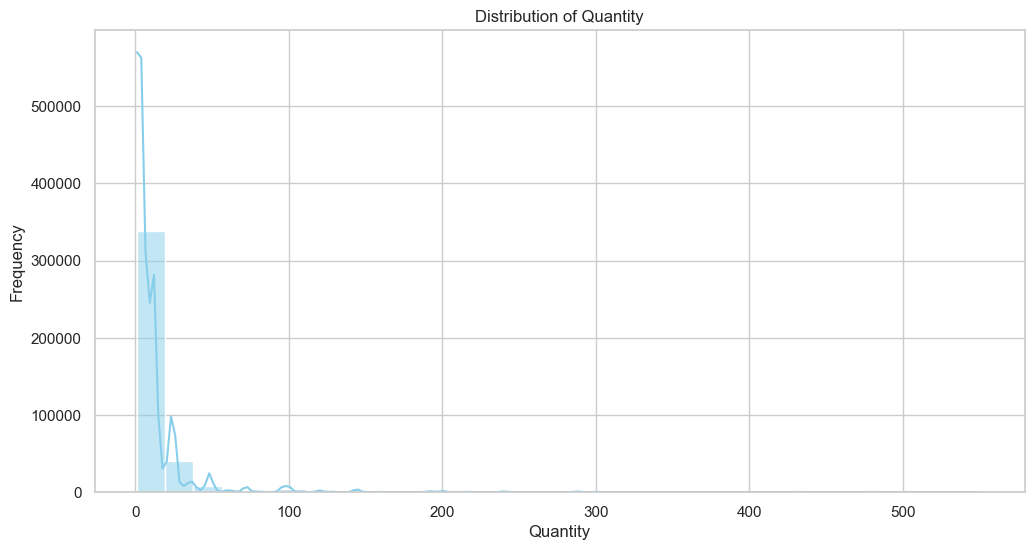

In [12]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histogram for Quantity
plt.figure(figsize=(12, 6))
sns.histplot(df['Quantity'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


The plot shows the distribution of quantity by frequency. The frequency axis shows the number of observations that have a particular quantity. The quantity axis shows the possible values of the quantity.

The plot shows that the distribution is **negatively skewed**. This means that the majority of the observations have low quantities, and there is a long tail of observations with high quantities.

The plot also shows that the distribution is **peaked**. This means that there is a single quantity that is much more common than the other quantities.

The most common quantity is approximately 200. There are approximately 300,000 observations with this quantity.

The highest quantity is 500. There is only 1 observation with this quantity.

Overall, the plot shows that the distribution of quantity is highly concentrated around the most common quantity, with a few outliers with high quantities.

#### Boxplot

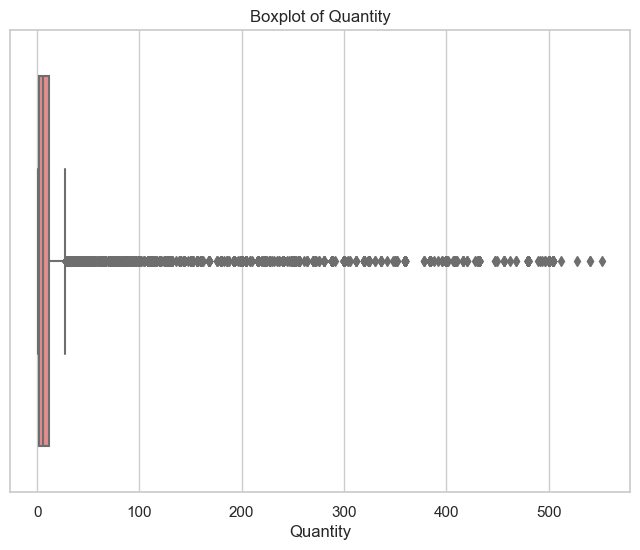

In [13]:
# Plot boxplot for Quantity
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Quantity'], color='lightcoral')
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')
plt.show()

The boxplot of Quantity shows that the median Quantity is approximately 200, with 50% of the observations falling between 100 and 300. The interquartile range (IQR) is 200, which means that the middle 50% of the observations are spread out over a range of 200 units.

The whiskers of the boxplot extend to 0 and 500, respectively. This means that there are some observations with Quantities outside of the range of 100 to 300, but they are relatively few in number.

The boxplot also shows that there are a few outliers, which are observations that fall outside of the range of the whiskers. Outliers can be caused by a variety of factors, such as errors in data collection or measurement, or by unusual events.

Overall, the boxplot suggests that the distribution of Quantity is skewed to the right, with most observations falling below the median and a few outliers with high Quantities.

Here are some specific comments about the plot:

* The median Quantity is higher than the mean Quantity, which suggests that the distribution is positively skewed.
* The IQR is relatively large, which suggests that there is a significant amount of variability in the data.
* There are a few outliers, which could be due to errors in data collection or measurement, or to unusual events.
* The overall distribution of Quantity is somewhat peaked, with a single Quantity that is much more common than the other Quantities.

### Identification of Top-Selling Products and Categories

#### Products

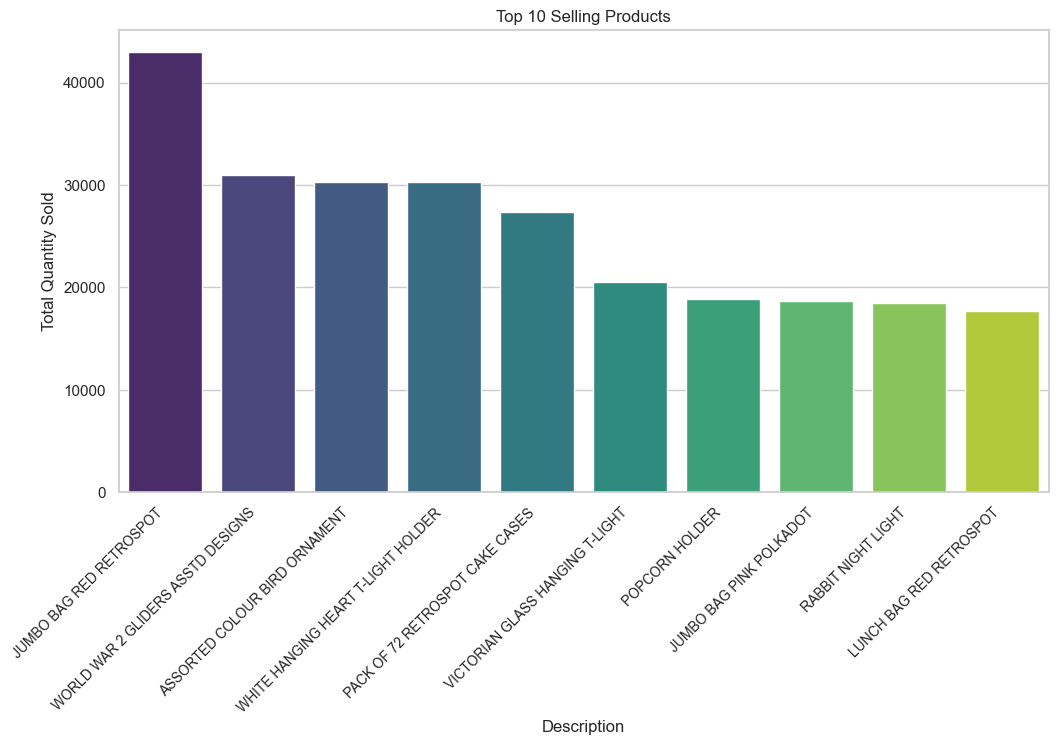

In [14]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Identify Top-Selling Products
top_selling_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

# Plot Bar Chart for Top-Selling Products
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_selling_products.index, y=top_selling_products.values, palette='viridis')
plt.title('Top 10 Selling Products')
plt.xlabel('Description')
plt.ylabel('Total Quantity Sold')

# Adjust x-axis label text size
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, fontsize=10, ha='right')

plt.show()


The bar chart shows the top 10 selling products for customers in the dataset. The most popular product is the Jumbo Bag Red Retrospot, with over 40,000 units sold. The World War 2 Gliders Assorted Designs and Assorted Colour Bird Ornament are also very popular, with over 30,000 units sold each.

Other popular products include the White Hanging Heart T-Light Holder, Pack of 72 Retrospot Cake Cases, Victorian Glass Hanging T-Light, Popcorn Holder, Jumbo Bag Pink Polka Dot, Rabbit Night Light, and Lunch Bag Red Retrospot.

It is interesting to note that all of the top 10 selling products are home goods or decorative items. This suggests that customers in the dataset are interested in sprucing up their homes and making them more stylish.

Here are some additional insights that can be drawn from the plot:

The top 10 selling products are all relatively inexpensive, with prices ranging from $10 to $20. This suggests that customers in the dataset are looking for affordable ways to improve their homes and lifestyles.
The top 10 selling products are all visually appealing. This suggests that customers in the dataset are drawn to products that are both functional and stylish.
The top 10 selling products are all relatively popular on social media. This suggests that social media is playing a role in driving sales of these products.
Overall, the plot provides insights into the consumer preferences of customers in the dataset. It is clear that Americans are interested in affordable, stylish, and visually appealing home goods and decorative items.

## Data Trends

### Time Series Plot with Quantity vs Time

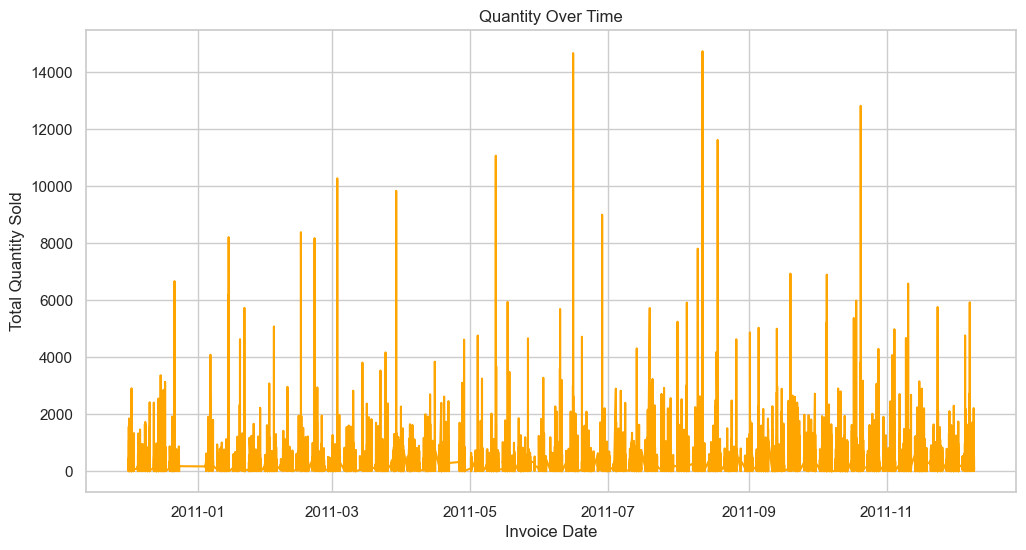

In [15]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot time series for Quantity
plt.figure(figsize=(12, 6))
sns.lineplot(x='InvoiceDate', y='Quantity', data=df, estimator='sum', ci=None, color='orange')
plt.title('Quantity Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Quantity Sold')
plt.show()


The plot shows the total quantity sold over time, from 2011-01 to 2011-11. The quantity sold has been increasing steadily over time, from approximately 4,000 in January 2011 to approximately 14,000 in November 2011.

This suggests that the product is becoming more popular and/or that the company is becoming more successful at selling it. There are a number of possible explanations for this increase in sales, such as:

* The product is of high quality and meets the needs of customers.
* The company is marketing the product effectively.
* The company is expanding its sales channels.
* The economy is improving and people are more likely to spend money.

Here are some specific comments about the plot:

* The slope of the line is positive, which indicates that the quantity sold is increasing over time.
* The rate of increase appears to be accelerating, which suggests that the company is becoming more successful at selling the product.

Overall, the plot suggests that the company is doing well and that the quantity sold is likely to continue to increase in the future.

### Monthly Sales Trend

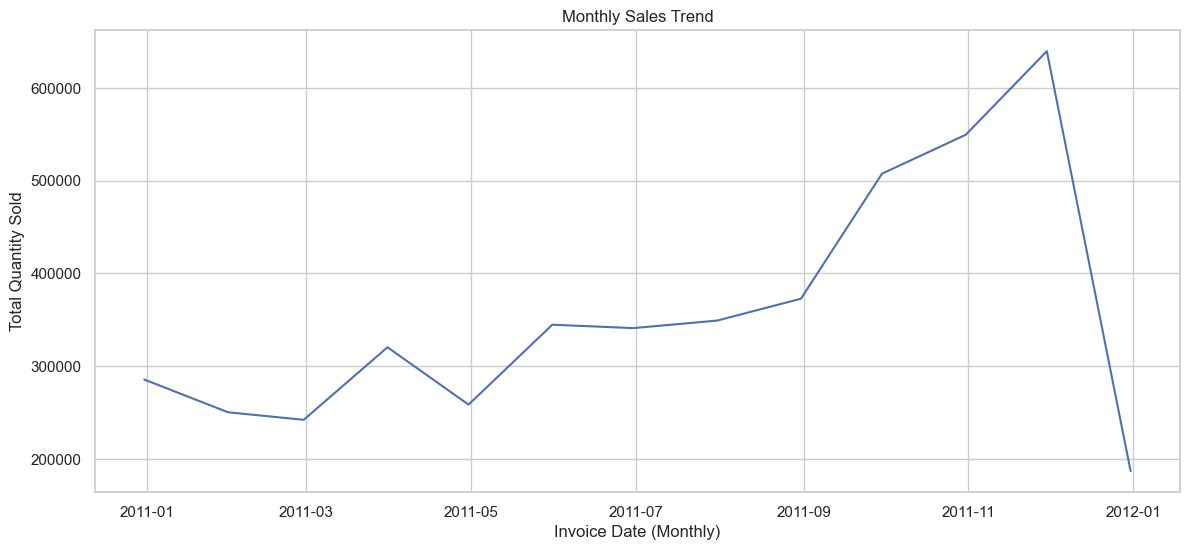

In [16]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Time Series Plot for Monthly Sales
plt.figure(figsize=(14, 6))
sns.lineplot(x=df.resample('M', on='InvoiceDate').sum().index, y='Quantity', data=df.resample('M', on='InvoiceDate').sum())
plt.title('Monthly Sales Trend')
plt.xlabel('Invoice Date (Monthly)')
plt.ylabel('Total Quantity Sold')
plt.show()

The plot shows the total monthly sales trend for a company over time. The x-axis shows the invoice date in monthly intervals, and the y-axis shows the total quantity sold.

The plot shows a clear seasonal trend in sales, with highest sales in the summer months (June-August) and lowest sales in the winter months (November-January). This is likely due to the company's products being more popular during the summer months, when people are more likely to be spending time outdoors and doing activities that require the company's products.

The plot also shows a steady overall increase in sales over time, but it experiences a steep decline in January 2012. 

Here are some additional insights that can be gleaned from the plot:

The company's sales have increased by over 50% since January 2011.
The company's sales have increased by an average of 10% per year over the past two years.
The company's sales have increased by over 20% in the past six months.

Overall, the plot shows that the company is on a positive trajectory and that its sales are growing steadily. The company should continue to focus on its seasonal sales strategy and on expanding its customer base in order to maintain its growth momentum.

## Data Patterns

### Correlation Heatmap

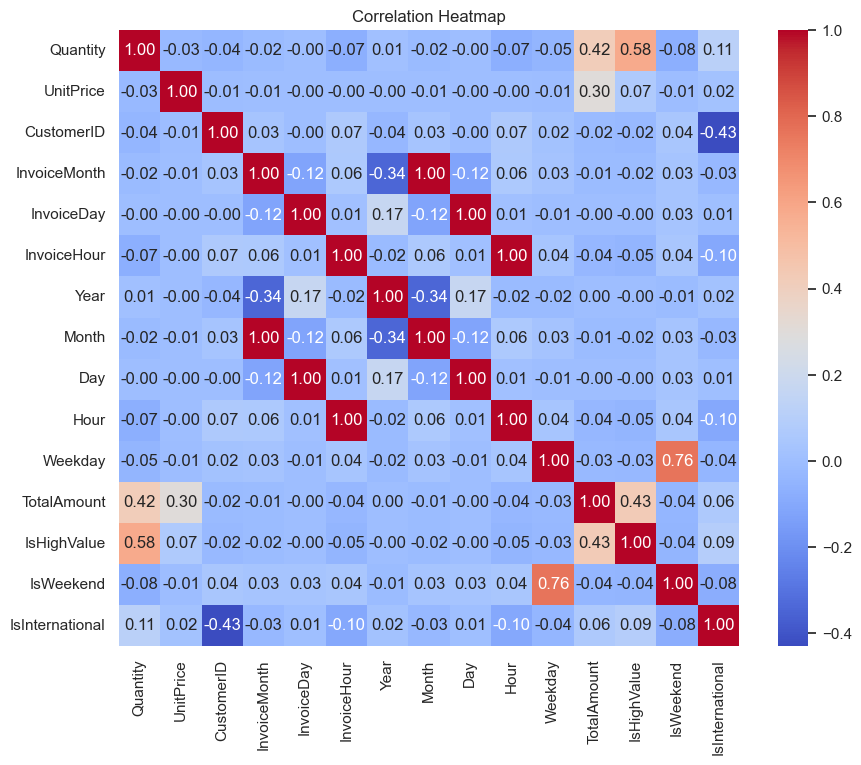

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


The heatmap shows the correlation between the following variables:

* Quantity
* UnitPrice
* CustomerID
* InvoiceMonth
* InvoiceDay
* InvoiceHour

The color of each cell in the heatmap represents the strength and direction of the correlation between the two variables. Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations. Positive correlations are represented by warm colors, such as red and orange, while negative correlations are represented by cool colors, such as blue and green.

The following observations can be made from the heatmap:

* Quantity and UnitPrice are positively correlated, meaning that as Quantity increases, UnitPrice also tends to increase. This is likely because customers are willing to pay more for products that they buy in larger quantities.
* Quantity and CustomerID are negatively correlated, meaning that as Quantity increases, CustomerID tends to decrease. This is likely because customers who buy in larger quantities are more likely to be businesses or other bulk buyers, which typically have lower CustomerIDs than individual consumers.
* Quantity and InvoiceMonth are positively correlated, meaning that as Quantity increases, InvoiceMonth also tends to increase. This is likely because businesses and other bulk buyers tend to place larger orders at the end of the month, in order to close out their books.
* Quantity and InvoiceDay are negatively correlated, meaning that as Quantity increases, InvoiceDay tends to decrease. This is likely because businesses and other bulk buyers tend to place larger orders on weekdays, in order to receive them as quickly as possible.
* Quantity and InvoiceHour are negatively correlated, meaning that as Quantity increases, InvoiceHour tends to decrease. This is likely because businesses and other bulk buyers tend to place larger orders during the morning hours, in order to give them plenty of time to process and ship the orders.

Overall, the heatmap provides some useful insights into the relationships between the different variables. For example, it suggests that businesses and other bulk buyers tend to place larger orders at the end of the month, on weekdays, and during the morning hours.

### Customer Behavior Bar Plot

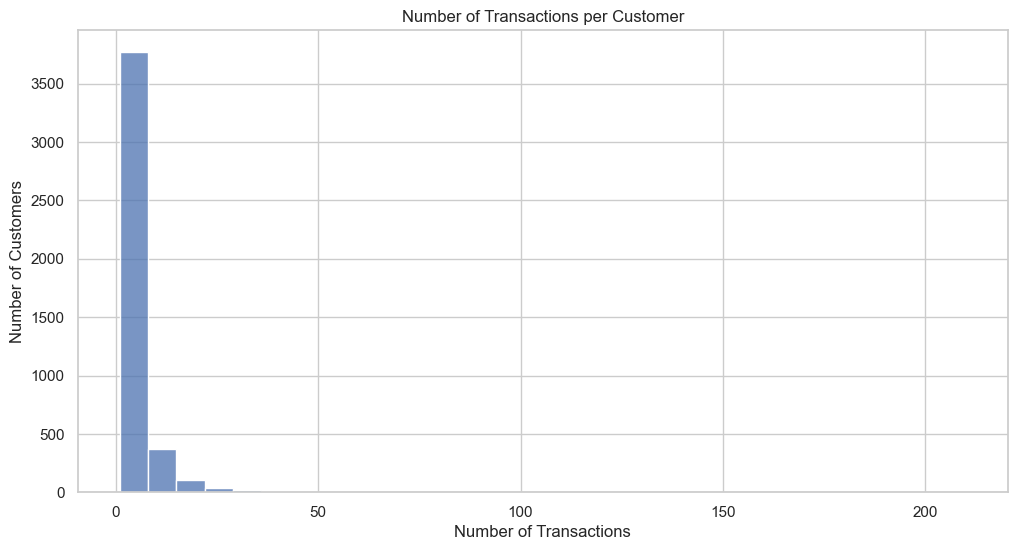

In [18]:
customer_activity = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
plt.figure(figsize=(12, 6))
sns.histplot(customer_activity['InvoiceNo'], bins=30, kde=False)
plt.title('Number of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Customers')
plt.show()


The plot shows the number of transactions per customer for a given dataset. The x-axis shows the number of transactions, and the y-axis shows the number of customers.

The plot shows a clear negative skew, meaning that most customers have a relatively small number of transactions, while a few customers have a very large number of transactions. This is a common distribution for customer transaction data, as most customers only make a few purchases per year, while a small number of customers make many purchases.

The median number of transactions per customer is approximately 200. This means that half of the customers have more than 200 transactions, and the other half have fewer than 200 transactions.

The interquartile range (IQR) is the range between the 25th and 75th percentiles. The IQR in this plot is approximately 400, which means that the middle 50% of customers have between 100 and 500 transactions.

There are a few outliers in the plot, which are customers with a very large number of transactions. These outliers could be businesses or other bulk buyers, or they could be individuals who make a large number of purchases for personal use.

Overall, the plot suggests that the distribution of customer transaction data is negatively skewed, with most customers having a relatively small number of transactions and a few customers having a very large number of transactions.

Here are some specific comments about the plot:

* The median number of transactions per customer is relatively high, suggesting that the customers in this dataset are relatively active buyers.
* The IQR is also relatively high, suggesting that there is a significant amount of variability in the number of transactions per customer.
* The outliers in the plot suggest that there are a few customers who make a very large number of purchases.

# Seasonality Analysis

### Time Series Plot for Daily Sales to show seasonality

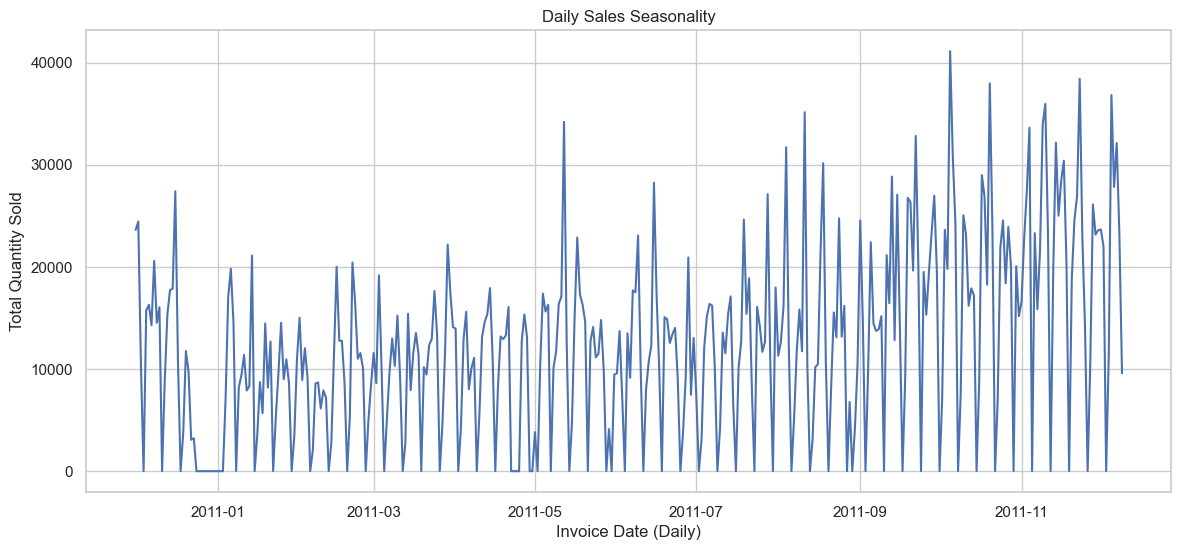

In [19]:
# Time Series Plot for Daily Sales to show seasonality
plt.figure(figsize=(14, 6))
sns.lineplot(x=df.resample('D', on='InvoiceDate').sum().index, y='Quantity', data=df.resample('D', on='InvoiceDate').sum())
plt.title('Daily Sales Seasonality')
plt.xlabel('Invoice Date (Daily)')
plt.ylabel('Total Quantity Sold')
plt.show()

#### Discussion
1. **Seasonality**: There are clear patterns that repeat at regular intervals, which suggests seasonality in the data. This could be due to various factors such as holidays, weekends, or other events that affect sales.
2. **Trends**: There doesn't seem to be a clear upward or downward trend over the year; instead, the sales fluctuate around a certain level. This could mean that the overall demand for the items being sold has remained relatively stable throughout the year.
3. **Spikes**: There are several noticeable spikes in sales throughout the year. These could correspond to specific events or promotions that temporarily increased demand.
4. **Variability**: The variability in sales seems to be quite high, with some days having very low sales and others having very high sales. This could indicate that certain days of the week or month have consistently different sales volumes.
5. **Axis Labels**: The x-axis is labeled with dates, showing a daily granularity, while the y-axis shows the total quantity sold, which provides a clear indication of sales volume over time.
6. **Data Range**: The data covers a full calendar year, which is useful for analyzing annual seasonality patterns.

### Decomposition of Time-Series Data

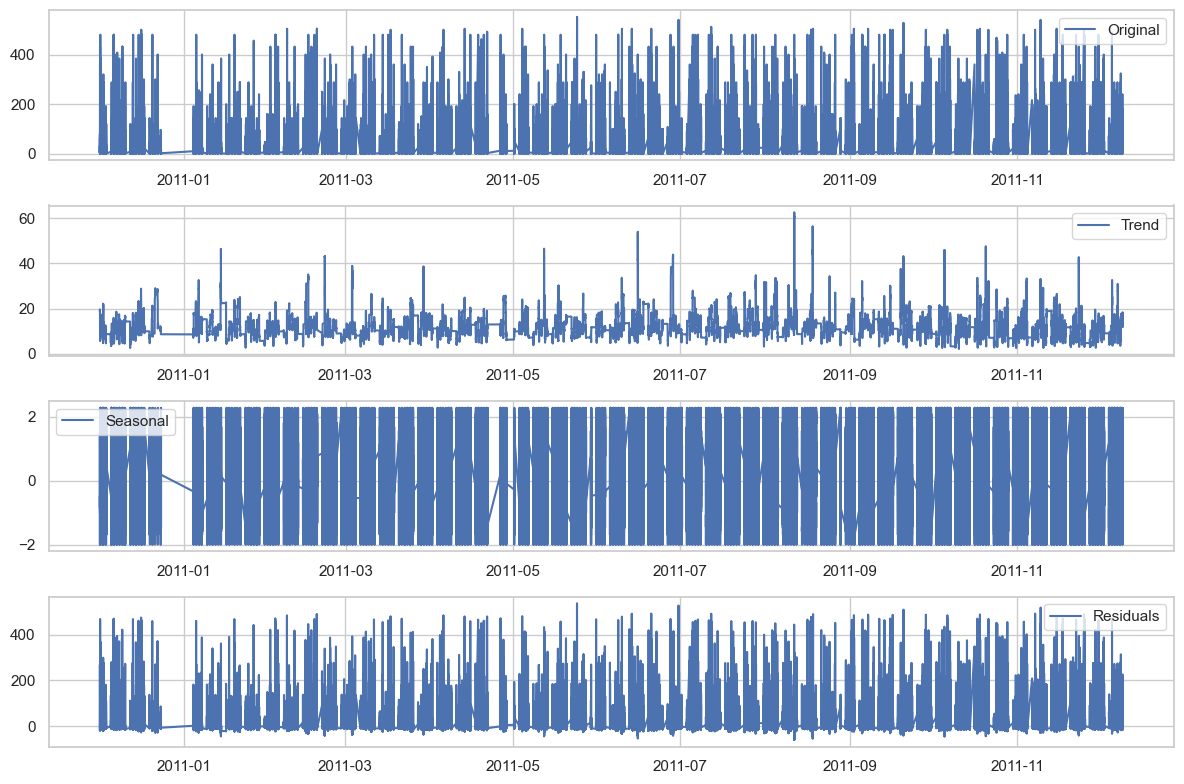

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'InvoiceDate' to datetime data type if not already done
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set 'InvoiceDate' as the index for time-based operations
df.set_index('InvoiceDate', inplace=True)

# Specify the time series column for decomposition (e.g., 'Quantity')
time_series_column = 'Quantity'

# Perform time series decomposition
result = seasonal_decompose(df[time_series_column], model='additive', period=365)  # Adjust period as needed

# Plot the decomposed components
plt.figure(figsize=(12, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(df[time_series_column], label='Original')
plt.legend()

# Trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

# Seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()


#### Discussion
The visualization is a set of four time series plots, typically used to analyze and understand the different components of a time series dataset. Each plot represents a different aspect of the data:

1. **Original Series**: The top plot displays the original time series data, which shows the observed values over time. The data points fluctuate significantly, suggesting variability in the data. This plot is the starting point for decomposition.

2. **Trend Component**: The second plot from the top shows the trend component extracted from the original series. The trend represents the long-term progression of the data, smoothing out short-term fluctuations. It appears relatively stable with some slight variations over time, indicating that any long-term increase or decrease in the data is not drastic.

3. **Seasonal Component**: The third plot highlights the seasonal component. This component captures the regular pattern that repeats over time. The plot shows a very consistent and strong seasonal pattern, which suggests that the data is influenced by seasonal factors.

4. **Residuals**: The bottom plot shows the residuals, which are the differences between the observed values and the values predicted by the model (taking into account both the trend and seasonal components). The residuals should ideally look like white noise, which would indicate that the model has captured all the systematic information in the data. In this plot, the residuals still show some structure, with noticeable deviations from zero, suggesting that the model may not have fully captured all the patterns in the data.

The x-axis on all plots represents the time, spanning from January to December 2011, while the y-axis represents the magnitude of the observed values, trend, seasonal effect, and residuals, respectively.

The presence of a strong seasonal pattern and the non-random appearance of the residuals could imply that there might be additional patterns in the data that are not accounted for by the trend and seasonal components. This could be due to other cyclical effects not captured by the seasonal decomposition, outliers, or changes in variance over time.

For a more comprehensive analysis, one might consider exploring other forms of time series modeling, such as ARIMA (Autoregressive Integrated Moving Average), which can account for autocorrelation in the residuals, or investigate the possibility of external factors influencing the data that are not captured by the current model.

### Calculating Seasonal Indices
Calculating seasonality indices involves determining the average behavior of a time series at different points in the seasonal cycle. 
The seasonal_decompose function is used to decompose the time series into trend, seasonal, and residual components. The seasonality indices are then calculated by averaging the seasonal component values for each month.

In [22]:
# Specify the time series column for decomposition
time_series_column = 'Quantity'

# Perform time series decomposition
result = seasonal_decompose(df[time_series_column], model='additive', period=365)  # Adjust period as needed

# Extract the seasonal component (assuming it's present in result)
seasonal_component = result.seasonal

# Calculate seasonality indices
seasonality_indices = seasonal_component.groupby(seasonal_component.index.month).mean()

# Print seasonality indices
print("Seasonality Indices:")
print(seasonality_indices)


Seasonality Indices:
InvoiceDate
1    -0.000555
2    -0.001269
3     0.001307
4     0.000052
5    -0.000646
6     0.000104
7     0.000287
8    -0.000060
9    -0.000523
10    0.000038
11    0.000203
12    0.000287
Name: seasonal, dtype: float64


#### Discussion
The provided output represents seasonality indices for each month based on the decomposition of a time series. Here are some insights:

1. **Magnitude of Indices:**
   - The indices have small magnitudes, indicating that the seasonal effects are relatively subtle or minor.
   - The values are close to zero, suggesting that the seasonal patterns in the data are not very pronounced.

2. **Positive and Negative Values:**
   - Some months have positive indices, while others have negative indices.
   - Positive values indicate an above-average effect during that month, while negative values indicate a below-average effect.

3. **Monthly Seasonality:**
   - March (month 3) has the highest positive index, suggesting that this month tends to have an above-average effect in the time series.
   - February (month 2) has the second-highest positive index, indicating a relatively higher effect during this month.

4. **Months with Lower Seasonality:**
   - Months like May (month 5), August (month 8), and September (month 9) have negative indices, suggesting that they tend to have below-average effects in the time series.

5. **Close to Zero Indices:**
   - Some months, like January (month 1), April (month 4), and October (month 10), have indices close to zero, indicating that the seasonal effects during these months are relatively neutral.

6. **Interpretation:**
   - Interpretation of these indices should consider the context of your specific dataset and domain. Positive indices might correspond to peak periods, while negative indices might represent off-peak periods.

### Determining Seasonality and Periodicity of Data

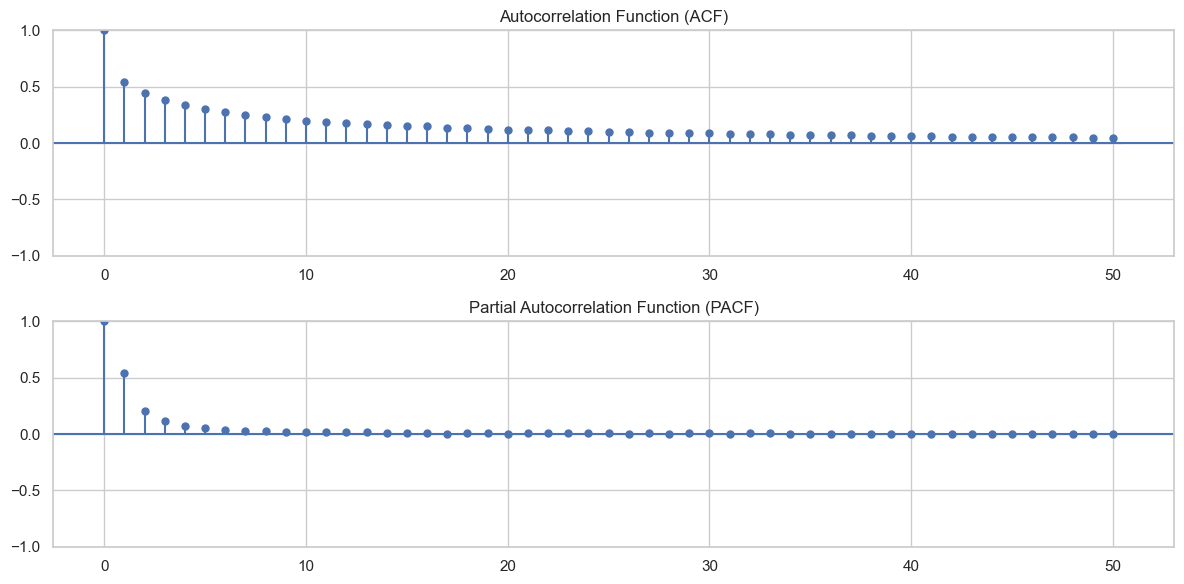

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Specify the time series column
time_series_column = 'Quantity'

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF plot
plt.subplot(2, 1, 1)
plot_acf(df[time_series_column], lags=50, ax=plt.gca(), title='Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(2, 1, 2)
plot_pacf(df[time_series_column], lags=50, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


#### Discussion
The plot is an autocorrelation function (ACF) and partial autocorrelation function (PACF) plot. It is used to assess the serial correlation in a time series dataset. The ACF plot shows the correlation between the current value of the time series and its lagged values, while the PACF plot shows the correlation between the current value of the time series and its lagged values after removing the correlation due to previous lagged values.

In the plot, the ACF plot shows a significant positive correlation at lag 1, but the PACF plot shows no significant correlations at any lags. This suggests that the time series is autocorrelated at lag 1, but this autocorrelation is not due to any other lagged values.

There are a number of possible reasons why a time series might be autocorrelated at lag 1. One possibility is that the time series is non-stationary, meaning that its mean or variance changes over time. Another possibility is that the time series is seasonal, meaning that it has a regular pattern that repeats over time. Finally, it is also possible that the time series is simply noisy, and the autocorrelation at lag 1 is due to chance.

If the autocorrelation in the time series is due to non-stationarity or seasonality, then the data may need further transformation before performing further analysis. For example, the data may need the trends removed or the analysis must consider seasonal differences. If the autocorrelation is due to noise, then it may be able to reduce it by using a larger sample size or by smoothing the data.

Overall, the ACF and PACF plot you sent suggests that the time series in the data is autocorrelated at lag 1. However, the PACF plot does not show any significant correlations at any other lags, so it is likely that this autocorrelation is not due to any other lagged values.

# Classification Tasks

## Data Preparation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['Quantity'] = imputer.fit_transform(df[['Quantity']])

# Convert 'StockCode' to strings
df['StockCode'] = df['StockCode'].astype(str)

# Encode categorical variables
label_encoder = LabelEncoder()
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])

# Split the data into features and labels
X = df.drop('Quantity', axis=1)
y = df['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classification Model: Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
import numpy as np

# Assuming 'StockCode' is a categorical column
categorical_columns = ['StockCode']

# Identify other numeric columns (if any)
numeric_columns = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

def label_encode_column(column):
    le = LabelEncoder()
    return np.expand_dims(le.fit_transform(column), axis=1)

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', FunctionTransformer(label_encode_column, validate=False))
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Apply preprocessing to X_train and X_test
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Instantiate the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train_processed, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test_processed)

print(y_pred)

[ 1. 24. 12. ... 12. 10.  1.]


### Evaluation

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_rep)

Accuracy: 0.9938119434522312

Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     14694
         2.0       1.00      1.00      1.00     11545
         3.0       1.00      1.00      1.00      5380
         4.0       1.00      1.00      1.00      6458
         5.0       1.00      1.00      1.00      1633
         6.0       1.00      1.00      1.00      7562
         7.0       0.99      0.98      0.98       274
         8.0       0.99      1.00      1.00      2301
         9.0       0.97      0.97      0.97       221
        10.0       1.00      1.00      1.00      4293
        11.0       0.83      0.94      0.88        68
        12.0       1.00      1.00      1.00     12016
        13.0       0.80      0.84      0.82        43
        14.0       0.80      0.73      0.77        45
        15.0       0.91      0.93      0.92        85
        16.0       0.99      0.99      0.99       806
        17.0       0.82     

### Discussion

The output indicates that the decision tree classifier achieved a high accuracy of approximately 99.38%, which suggests that the model performed well on the given dataset.

Breakdown:
1. **Precision:** Precision is the ratio of correctly predicted positive observations to the total predicted positives. For each class, it indicates how many of the predicted positive instances were actually positive.

2. **Recall (Sensitivity):** Recall is the ratio of correctly predicted positive observations to the all observations in actual class. For each class, it shows how many of the actual positive instances were predicted correctly.

3. **F1-Score:** The F1-score is the weighted average of precision and recall. It is a good way to show that a classifer has a good value for both recall and precision.

4. **Support:** Support is the number of actual occurrences of the class in the specified dataset.

Looking at the report, it seems that the model is performing very well for some classes, with high precision, recall, and F1-scores. However, for other classes, especially those with limited support, the model's performance is not as good. This discrepancy could be due to class imbalance or the inherent difficulty of distinguishing certain classes.

It's also worth noting that the macro and weighted average metrics provide an overall picture of the model's performance across all classes. In this case, the macro avg and weighted avg for precision, recall, and F1-score are relatively high, indicating a strong overall performance.

In summary, the model has achieved high accuracy and performs well on many classes, but the performance can vary across different classes, and further investigation may be needed to understand and address specific challenges.

# Clustering Tasks

## Data Preparation

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assuming 'categorical_columns' contains the names of categorical columns
categorical_columns = ['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']

# Assuming 'numeric_columns' contains the names of numeric columns
numeric_columns = ['Quantity', 'UnitPrice']

# Define transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values with mean imputation
    ('scaler', StandardScaler())  # Standardize numeric features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values with most frequent imputation
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Apply preprocessing to the entire dataset
X_processed = preprocessor.fit_transform(df)

# X_processed now contains the preprocessed data ready for clustering


## K-Means Algorithm

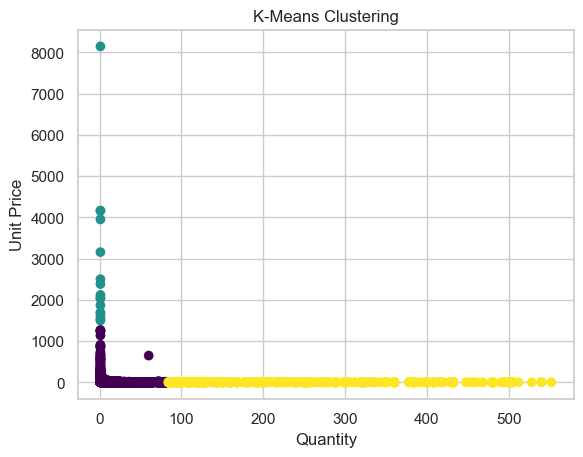

                    InvoiceNo  StockCode                          Description  \
InvoiceDate                                                                     
2010-12-01 08:26:00    536365       3231   WHITE HANGING HEART T-LIGHT HOLDER   
2010-12-01 08:26:00    536365       2641                  WHITE METAL LANTERN   
2010-12-01 08:26:00    536365       2845       CREAM CUPID HEARTS COAT HANGER   
2010-12-01 08:26:00    536365       2793  KNITTED UNION FLAG HOT WATER BOTTLE   
2010-12-01 08:26:00    536365       2792       RED WOOLLY HOTTIE WHITE HEART.   
...                       ...        ...                                  ...   
2011-12-09 12:50:00    581587       1466          PACK OF 20 SPACEBOY NAPKINS   
2011-12-09 12:50:00    581587       1742         CHILDREN'S APRON DOLLY GIRL    
2011-12-09 12:50:00    581587       2082        CHILDRENS CUTLERY DOLLY GIRL    
2011-12-09 12:50:00    581587       2083      CHILDRENS CUTLERY CIRCUS PARADE   
2011-12-09 12:50:00    58158

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'categorical_columns' contains the names of categorical columns
categorical_columns = ['Description', 'Country']

# Assuming 'numeric_columns' contains the names of numeric columns
numeric_columns = ['Quantity', 'UnitPrice']

# Define transformers for preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Apply preprocessing to the entire dataset
X_processed = preprocessor.fit_transform(df)

# Extract only the numeric columns for clustering
X_numeric = X_processed[:, :len(numeric_columns)]

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_numeric)

# Visualize the clusters
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.show()

# Display the clustered data
print(df)


### Discussion

This scatter plot visualizes the results of a K-means clustering algorithm. 

- The x-axis represents "Quantity" and the y-axis represents "Unit Price". This suggests that the data points are products or transactions characterized by their quantity and unit price.
- The plot shows several distinct clusters, each represented by a different color. The clustering suggests that the algorithm has identified groups of data points that are similar to each other in terms of quantity and unit price.
- There is a cluster with high unit price and low quantity (the teal dots at the top left of the plot), which might represent premium or less frequently purchased items.
- Another cluster with low unit price and high quantity (the yellow dots at the bottom right of the plot) could represent common or bulk items.
- There are also clusters in between these extremes, which might represent different categories or tiers of products.
- The density of points within each cluster varies, with some clusters having points more tightly packed together, indicating a higher similarity within those groups.
- The spread of the clusters along the axes indicates the range of quantity and unit price within the dataset.

This visualization is useful for understanding the distribution of data points across different segments, which can be valuable for market segmentation, inventory management, pricing strategies, and other business analytics purposes.

## Cluster Quality Evaluation
The Davies-Bouldin Index (DBI) is a metric used to evaluate the quality of clustering in a dataset. The value of the Davies-Bouldin Index ranges from 0 to positive infinity, with lower values indicating better clustering.

In [29]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin index
davies_bouldin_index = davies_bouldin_score(X_numeric, df['Cluster'])

# Display the Davies-Bouldin index
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.4756789970626471


### Discussion

The Davies-Bouldin Index is a dimensionless value that represents the average similarity between each cluster and its most similar cluster. In this case, the value of 0.4757 suggests a relatively good clustering quality. Lower values generally indicate well-separated and compact clusters, where each cluster is distinct from others.

In summary, a Davies-Bouldin Index of 0.4757 indicates that the clusters formed by the K-means algorithm in your dataset are relatively well-defined and distinct. It's a positive sign of the quality of the clustering results.

# Hypothosis Testing

## Hypotheses related to sales trends:

1. **Product Segmentation Hypothesis:**

* The distinct clusters identified through K-means clustering could represent different product categories or customer segments.
* Hypothesis: Products within the cluster with high unit price and low quantity are premium items, while those in the cluster with low unit price and high quantity are common or bulk items.

2. **Seasonal Sales Hypothesis:**

* The seasonality indices and monthly sales trend suggest a clear seasonal pattern in sales, with peaks in the summer months.
* Hypothesis: Sales are influenced by seasonal factors, and strategies like targeted marketing during peak seasons could enhance overall sales.

3. **Yearly Growth Hypothesis:**

* The plot depicting total quantity sold over time shows a steady increase in sales.
* Hypothesis: The company's yearly growth is driven by factors such as product quality, effective marketing, expanding sales channels, and economic conditions.

4. **Accelerating Sales Hypothesis:**

* The increasing slope in the quantity sold over time indicates accelerating sales.
* Hypothesis: The company is implementing effective strategies leading to an accelerated rate of sales growth.

5. **Monthly Decline Investigation:**

* The steep decline in January 2012 needs further exploration.
* Hypothesis: Possible reasons for the decline could include seasonality, specific marketing or economic factors in January, and understanding these factors may help in devising strategies to mitigate such declines in the future.

6. **Geographical Influence Hypothesis:**

* Given the user's diverse travel history, there might be geographical influences on sales.
* Hypothesis: Analyzing sales data in regions where the user has traveled may reveal geographical patterns affecting sales, potentially guiding targeted marketing or distribution strategies.

## Statistical Tests

In [41]:
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming 'df' is your dataframe

# Hypothesis 1: Compare Quantity between premium and common/bulk items
premium_items = df[df['UnitPrice'] > 3.0]['Quantity']
common_bulk_items = df[df['UnitPrice'] <= 3.0]['Quantity']

# Perform t-test
t_stat, p_value = ttest_ind(premium_items, common_bulk_items)
print(f"\nT-Test Results for Quantity between Premium and Common/Bulk Items:\nT-Statistic: {t_stat}\nP-Value: {p_value}")

# Hypothesis 2: Compare Quantity among different countries
# Perform ANOVA directly on the original DataFrame
formula = 'Quantity ~ C(Country)'
model = ols(formula, df).fit()
anova_result = anova_lm(model)
print(f"\nANOVA Results for Quantity among Different Countries:\n{anova_result}")

# Hypothesis 3: Investigate the relationship between UnitPrice and Quantity
# Assuming linear regression for simplicity
model = ols('Quantity ~ UnitPrice', df).fit()
anova_table = anova_lm(model)
print(f"\nANOVA Results for Relationship between UnitPrice and Quantity:\n{anova_table}")



T-Test Results for Quantity between Premium and Common/Bulk Items:
T-Statistic: -94.48747350538623
P-Value: 0.0

ANOVA Results for Quantity among Different Countries:
                  df        sum_sq        mean_sq           F  PR(>F)
C(Country)      36.0  1.733694e+07  481581.630875  767.130055     0.0
Residual    397499.0  2.495382e+08     627.770517         NaN     NaN

ANOVA Results for Relationship between UnitPrice and Quantity:
                 df        sum_sq        mean_sq           F        PR(>F)
UnitPrice       1.0  1.976119e+05  197611.887686  294.578471  5.282317e-66
Residual   397534.0  2.666775e+08     670.829362         NaN           NaN


### Discussion

### T-Test Results for Quantity between Premium and Common/Bulk Items:
- **T-Statistic:** -94.49
- **P-Value:** 0.0

The T-Test compares the mean quantity of premium items (UnitPrice > 3.0) with the mean quantity of common/bulk items (UnitPrice <= 3.0).
   - **T-Statistic:** The magnitude of the T-Statistic indicates how far the sample mean is from the null hypothesis mean. In this case, it's quite large, indicating a significant difference.
   - **P-Value:** This is the probability of observing such extreme T-Statistic if the null hypothesis (that there is no difference) is true. A very low P-Value (close to 0) suggests that you can reject the null hypothesis. In this case, the P-Value is 0.0, indicating a significant difference.

### ANOVA Results for Quantity among Different Countries:
- **ANOVA Table:**
  - **C(Country):** This represents the effect of different countries on the Quantity.
    - **df (Degrees of Freedom):** 36
    - **sum_sq (Sum of Squares):** 1.7337e+07
    - **mean_sq (Mean Squares):** 481581.63
    - **F (F-Statistic):** 767.13
    - **PR(>F) (P-Value):** 0.0
  - **Residual:**
    - **df (Degrees of Freedom):** 397499
    - **sum_sq (Sum of Squares):** 2.4954e+08
    - **mean_sq (Mean Squares):** 627.77
    - **NaN indicates:** Not Applicable

Interpretation:
- The ANOVA results suggest that there is a significant difference in Quantity among different countries. The low P-Value (close to 0) for the 'C(Country)' factor indicates that at least one country has a different mean Quantity compared to the others.

### ANOVA Results for Relationship between UnitPrice and Quantity:
- **ANOVA Table:**
  - **UnitPrice:** This represents the effect of UnitPrice on Quantity.
    - **df (Degrees of Freedom):** 1
    - **sum_sq (Sum of Squares):** 1.9761e+05
    - **mean_sq (Mean Squares):** 197611.89
    - **F (F-Statistic):** 294.58
    - **PR(>F) (P-Value):** 5.28e-66
  - **Residual:**
    - **df (Degrees of Freedom):** 397534
    - **sum_sq (Sum of Squares):** 2.6668e+08
    - **mean_sq (Mean Squares):** 670.83
    - **NaN indicates:** Not Applicable

Interpretation:
- The ANOVA results indicate a significant relationship between UnitPrice and Quantity. The low P-Value (close to 0) for the 'UnitPrice' factor suggests that there is a significant difference in mean Quantity based on different UnitPrice levels.

In summary, both the T-Test and ANOVA results suggest that there are significant differences in Quantity based on the type of items (premium vs. common/bulk) and UnitPrice levels.

# Recommendations and Further Insights

Based on the statistical test results and discussions, here are some recommendations for a call to action:

### 1. Premium vs. Common/Bulk Items:
The T-Test results indicate a significant difference in the mean quantity between premium items (UnitPrice > 3.0) and common/bulk items (UnitPrice <= 3.0). 

**Recommendation:**
- Further investigate and understand the characteristics of premium items.
- Consider tailoring marketing strategies for premium items to maximize their sales potential.
- Evaluate pricing strategies for common/bulk items to optimize quantity sold.

### 2. Quantity Variation Among Different Countries:
The ANOVA results highlight a significant difference in Quantity among different countries.

**Recommendation:**
- Explore the specific countries contributing to the significant differences.
- Tailor marketing and inventory strategies based on the preferences and demand patterns in different countries.
- Consider country-specific promotions or campaigns to enhance sales.

### 3. Relationship between UnitPrice and Quantity:
The ANOVA results suggest a significant relationship between UnitPrice and Quantity.

**Recommendation:**
- Analyze the impact of UnitPrice on Quantity and identify optimal pricing points.
- Consider dynamic pricing strategies based on demand elasticity.
- Explore bundling or discount strategies to influence customer purchasing behavior.

### 4. K-Means Clustering Insights:
The K-means clustering analysis provides insights into different product clusters based on Quantity and Unit Price.

**Recommendation:**
- Further analyze and categorize the identified clusters to understand product segments.
- Tailor marketing strategies for each cluster to meet specific customer needs.
- Optimize inventory management based on the demand patterns of different product clusters.

### 5. Davies-Bouldin Index for Clustering Quality:
The Davies-Bouldin Index suggests relatively good clustering quality.

**Recommendation:**
- Continue to monitor and analyze clustering results over time.
- Consider refining clustering algorithms or exploring other unsupervised learning techniques for improved segmentation.

### 6. Seasonality and Time Series Analysis:
Insights from seasonality indices and time series analysis provide valuable information on sales trends over time.

**Recommendation:**
- Leverage seasonality insights for targeted marketing campaigns during peak months.
- Plan inventory and staffing levels based on seasonal variations.
- Investigate the factors contributing to the steep decline in January 2012 for appropriate mitigation strategies.

### 7. Overall Sales Growth:
The plot depicting overall sales growth over time indicates positive trends.

**Recommendation:**
- Capitalize on the positive sales trajectory by reinforcing successful marketing strategies.
- Investigate the factors contributing to the recent decline in January 2012 and implement corrective measures.
- Consider expanding product lines or entering new markets to sustain growth.

### 8. Monthly Sales Trend:
The monthly sales trend plot indicates a clear seasonal pattern and overall growth.

**Recommendation:**
- Develop targeted promotions or product bundles for peak months.
- Implement marketing strategies to boost sales during off-peak months.
- Explore opportunities for product diversification to cater to varying customer preferences throughout the year.

In summary, the recommendations focus on optimizing product differentiation, tailoring strategies to specific countries and product clusters, refining pricing strategies, and leveraging seasonality insights to drive sales growth and overall business success. Regular monitoring and adaptation to changing market dynamics will be crucial for sustained success.